### Imports

In [1]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualisator import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualisator
import logic

import importlib

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualisator)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\sampled-networks\\logic.py'>

### Dataset creation

In [2]:
xd = 4  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [200]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [3]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=epochs)

### Sampled Netwrok training with ridge, and losses comparaison

In [4]:
model_sampled = SampledNet()
alpha, radius = model_sampled.fit(
    dataset.X_train, dataset.y_train, model_nn, layer2="ridge", radius=-1, alpha=-1
)

y_nn = model_nn.predict(dataset.X_test)
y_sampled = model_sampled.predict(dataset.X_test)

print(
    f"loss y_nn and y_test      \t{sklearn.metrics.mean_squared_error(y_nn, dataset.y_test)}"
)
print(
    f"loss y_sampled and y_test \t{sklearn.metrics.mean_squared_error(y_sampled, dataset.y_test)}"
)


radius: 0.000


100%|██████████| 200/200 [00:00<00:00, 4603.11it/s]

alpha 	loss
0.0001 	1.532e-02
0.001 	1.310e-02
0.01 	1.451e-02
0.1 	1.500e-02
1 	1.510e-02
10 	1.503e-02
100 	1.488e-02

radius: 0.185


100%|██████████| 200/200 [00:00<00:00, 3030.53it/s]

alpha 	loss
0.0001 	1.655e-02
0.001 	1.364e-02
0.01 	1.149e-02
0.1 	1.244e-02
1 	1.426e-02
10 	1.473e-02


100 	1.468e-02

radius: 0.370


100%|██████████| 200/200 [00:00<00:00, 703.34it/s]


alpha 	loss
0.0001 	6.200e-03
0.001 	3.736e-03
0.01 	3.506e-03
0.1 	4.730e-03
1 	8.075e-03
10 	1.086e-02
100 	1.155e-02

radius: 0.555


100%|██████████| 200/200 [00:00<00:00, 229.17it/s]


alpha 	loss
0.0001 	1.692e-03
0.001 	1.416e-03
0.01 	1.236e-03
0.1 	1.532e-03
1 	3.131e-03
10 	6.671e-03
100 	8.572e-03

radius: 0.740


100%|██████████| 200/200 [00:02<00:00, 98.85it/s] 


alpha 	loss
0.0001 	9.839e-04
0.001 	9.888e-04
0.01 	9.576e-04
0.1 	1.288e-03
1 	2.621e-03
10 	5.941e-03
100 	8.420e-03

radius: 0.925


100%|██████████| 200/200 [00:04<00:00, 44.95it/s]


alpha 	loss
0.0001 	1.101e-03
0.001 	1.010e-03
0.01 	9.972e-04
0.1 	1.338e-03
1 	2.700e-03
10 	5.980e-03
100 	8.048e-03

radius: 1.110


100%|██████████| 200/200 [00:07<00:00, 28.37it/s]


alpha 	loss
0.0001 	1.027e-03
0.001 	1.001e-03
0.01 	9.506e-04
0.1 	1.210e-03
1 	2.481e-03
10 	5.826e-03
100 	7.924e-03

radius: 1.295


100%|██████████| 200/200 [00:08<00:00, 23.54it/s]


alpha 	loss
0.0001 	1.027e-03
0.001 	1.001e-03
0.01 	9.506e-04
0.1 	1.210e-03
1 	2.481e-03
10 	5.826e-03
100 	7.924e-03

radius: 1.479


100%|██████████| 200/200 [00:09<00:00, 21.18it/s]


alpha 	loss
0.0001 	1.027e-03
0.001 	1.001e-03
0.01 	9.506e-04
0.1 	1.210e-03
1 	2.481e-03
10 	5.826e-03
100 	7.924e-03

radius: 1.664


100%|██████████| 200/200 [00:09<00:00, 21.04it/s]

alpha 	loss
0.0001 	1.027e-03
0.001 	1.001e-03
0.01 	9.506e-04
0.1 	1.210e-03
1 	2.481e-03
10 	5.826e-03
100 	7.924e-03
loss y_nn and y_test      	0.0048390263453607476
loss y_sampled and y_test 	0.0008817953404811634


### Plot the weights' angles differences, and prediction vs actual visualization

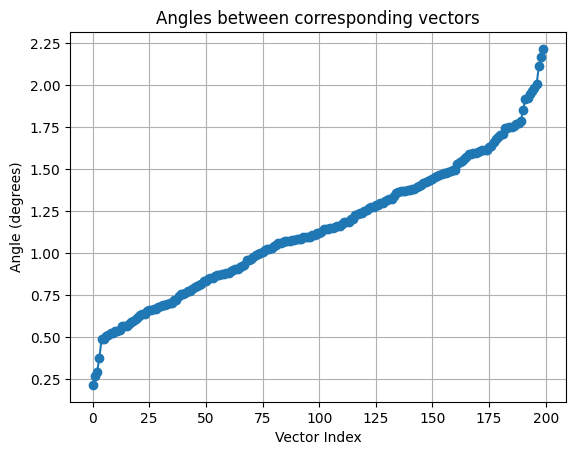

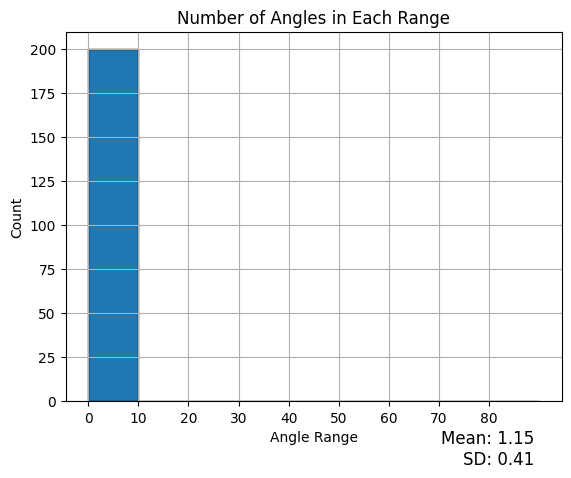

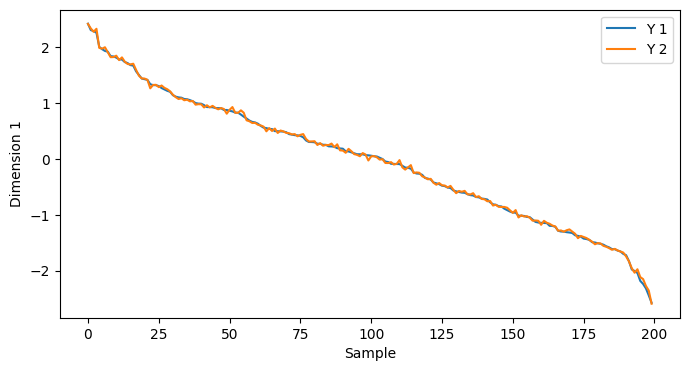

In [5]:
plot_vector_differences(
    np.transpose(model_nn.weights[0]), np.transpose(model_sampled.weights[0])
)
visualize_data(dataset.y_test, y_sampled)

### Calculate loss vs alpha, radius.

In [6]:
dict_loss_vs_alpha_radius = loss_vs_aslpha_radius(dataset, model_nn)
write_to_file("results\loss_vs_alpha_radius.json", dict_loss_vs_alpha_radius)

radius: 0.000


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 5128.45it/s]


radius: 0.189


100%|██████████| 200/200 [00:00<00:00, 2938.36it/s]


radius: 0.378


100%|██████████| 200/200 [00:00<00:00, 589.28it/s]


radius: 0.567


100%|██████████| 200/200 [00:01<00:00, 176.47it/s]


radius: 0.756


100%|██████████| 200/200 [00:03<00:00, 65.22it/s]


radius: 0.945


100%|██████████| 200/200 [00:06<00:00, 30.35it/s]


radius: 1.134


100%|██████████| 200/200 [00:09<00:00, 21.67it/s]


radius: 1.322


100%|██████████| 200/200 [00:11<00:00, 16.76it/s]


radius: 1.511


100%|██████████| 200/200 [00:12<00:00, 16.06it/s]


radius: 1.700


100%|██████████| 200/200 [00:12<00:00, 16.61it/s]


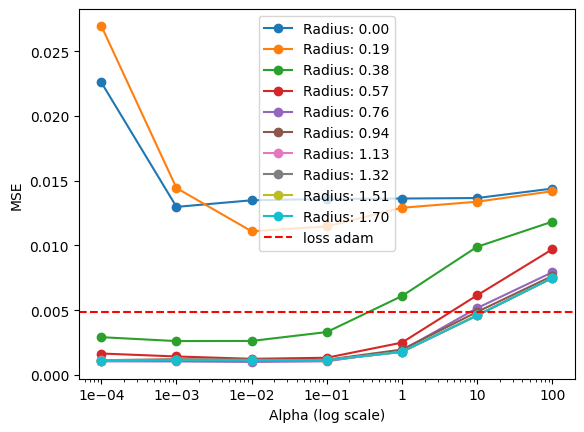

In [7]:
dict_loss_vs_alpha_radius = read_from_file("results\loss_vs_alpha_radius.json")
plot_loss_vs_alpha_radius(dict_loss_vs_alpha_radius)

### dataset creation and neural networks training with different numbre of samples

In [ ]:
nums_samples = [100, 200, 400, 800, 1600, 3200, 6400]
xd = 4
layers = [200]
datasets = []
models_nn = []
for num_samples in nums_samples:
    model_nn = NeuralNet()
    dataset = Dataset().create_dataset_Barron(xd, num_samples)
    dataset.scale(preprocessing.MinMaxScaler())
    dataset.split_train_test(0.2)
    model_nn.fit(dataset.X_train, dataset.y_train, layers)
    datasets.append(dataset)
    models_nn.append(model_nn)

### loss vs number of samples

In [ ]:
# Attention, takes 30+ minutes
dict_losses_vs_num_samples = loss_vs_num_samples(datasets, models_nn)
write_to_file("results\loss_vs_num_samples.json", dict_losses_vs_num_samples)

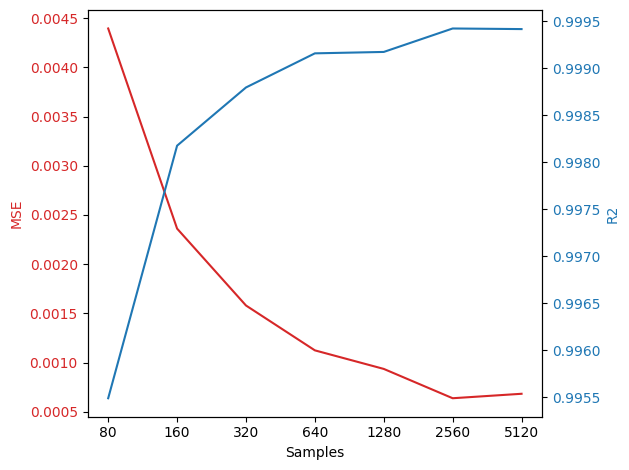

In [9]:
dict_losses_vs_num_samples = read_from_file("results\loss_vs_num_samples.json")
plot_loss_f_num_samples(dict_losses_vs_num_samples)